In [78]:
# Import the principal libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data preprocessing

In [80]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [81]:
df.info() # Obtaining information about the different columns, we can see that all the data is numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [82]:
df.describe(include = 'all').T  # Statistical information abouth the different columns

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


### Checking for duplicated values

In [84]:
df[df.duplicated()]  # Putting the result into a new dataframe for clarity, there's no duplicated data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


### Checking for missing values

In [86]:
df.isnull().sum()  # Information about the number of missing values in each column

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [87]:
print('Percentage of missing data:', ((df.isnull().sum()).sum())/4240 * 100, '%') # Percentage of missing data

Percentage of missing data: 15.212264150943398 %


### Handling missing values

#### Since the missing data only represents a 15% of the whole dataset, we can replace these missing values with aproximations based on the statistics of the dataset. We have to take care of the following columns:

#### - Glucose      (Continuous variable --> Median/Mean)
#### - Education    (Categorical variable --> Mode)
#### - BPMeds       (Categorical variable --> Mode)
#### - totChol      (Continuous variable --> Median/Mean)
#### - cigsPerDay   (Continuous variable --> Median/Mean)     
#### - BMI          (Continuous variable --> Median/Mean)
#### - heartRate    (Continuous variable --> Median/Mean)

In [89]:
original_df = df.copy() # Save the original dataset just in case

### Glucose, totChol, cigsPerDay, BMI, heartRate

#### The glucose column presents continuous values (they can take any value within a range). For continuous variables, missing values can be usually replaced with the mean or the median. In this case, we can see that both values are pretty close, meaning that the data distribution is likely to be symmetric or nearly symmetric.

In [91]:
df['glucose'] = df['glucose'].fillna(df['glucose'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

### Education, BPMeds

#### In this case, education is not a continuous value but a categorical one. These types of values are non-numerical or discrete variables that represent categories. In this case, instead of using the mean/median value, the missing values can be filled using the mode, which is the most repeated value in the da

In [93]:
df['education'] = df['education'].fillna(df['education'].mode()[0]) # The mode() command provides a pandas series, so we take the first value
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])

#### If we check again the missing values we can see that the problem is solved. 

In [95]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Exploratory Data Analysis

#### We can make a correlation heatmap to check the possible relation between variables

Text(0.5, 1.0, 'Correlation map')

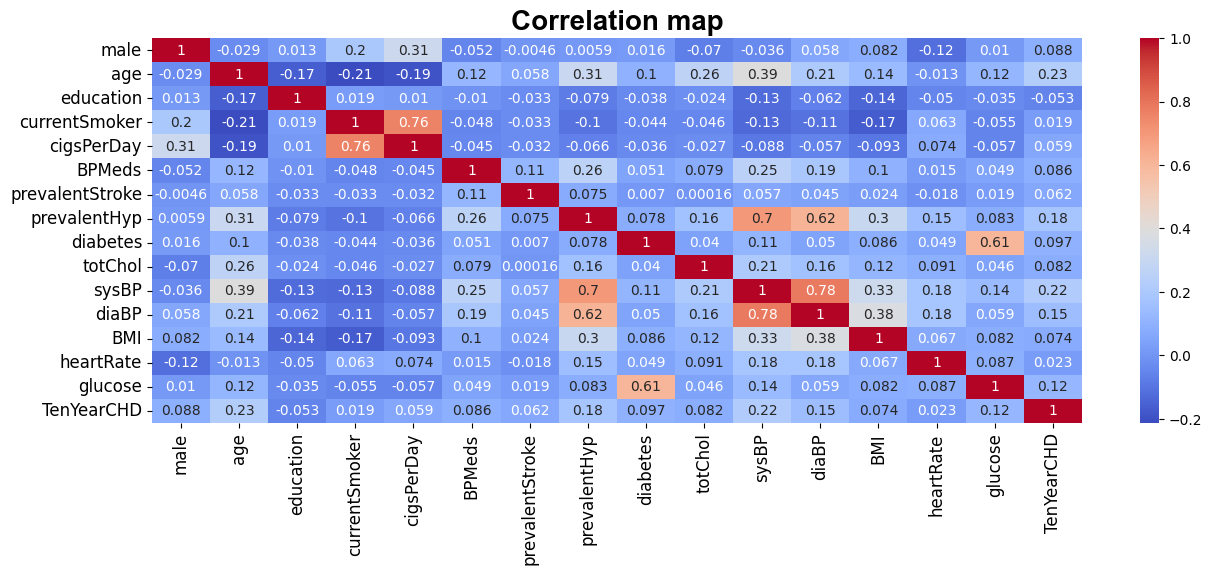

In [97]:
corr = df.corr()

plt.figure(figsize=(15,5))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Correlation map', fontsize = 20, fontweight='bold', **csfont)

#### From the correlation map, we can see that the highest correlations with the target column (TenYearCHD) are:

#### - Age (0.23)
#### - sysBP (0.22) --> The higher the systolic pressure in the arteries, the higher probability of CHD
#### - prevalentHyp (0.18) --> The higher hypertension, the higher probability of CHD
#### - diaBP (0.15) --> The higher the diastolic pressure in the arteries, the higher probability of CHD

#### Analysing this, we can conclude that the major correlations with CHD are given by blood pressure-related issues. Moreover, it's interesting to see other relations, like the high correlation between diabetes and glucose, or hypertension with systolic blood pressure.

### Age vs CHD

#### From the box plot, we can see that the 50% of the patients that present CHD are comprehended between 48 and 61 years old, approximately, meaning that this age range is more prone to suffer CHD.

Text(0, 0.5, 'Age')

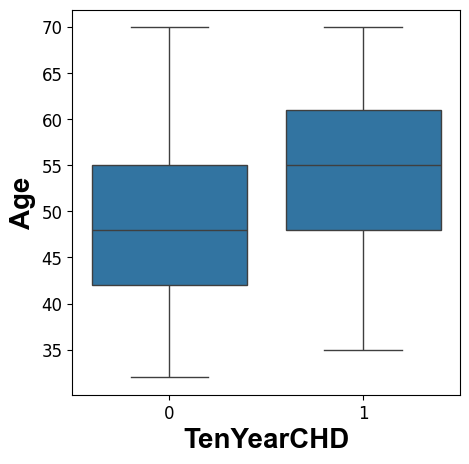

In [100]:
plt.figure(figsize=(5,5))
sns.boxplot(x=df['TenYearCHD'], y = df['age'], data = df)
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('TenYearCHD', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('Age', fontsize = 20, fontweight='bold', **csfont)

### sysBP vs CHD

#### From the histogram, we can see that for patients with a systolic blood pressure around 140, the risk of having CHD is higher.

Text(0, 0.5, 'sysBP')

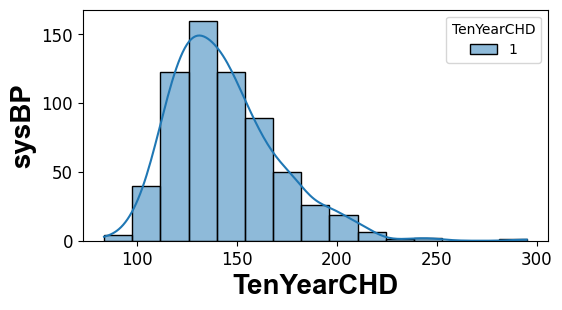

In [102]:
plt.figure(figsize=(6,3))
sns.histplot(data = df[df['TenYearCHD'] == 1], x = 'sysBP', hue = 'TenYearCHD', kde = True, bins = 15)
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('TenYearCHD', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('sysBP', fontsize = 20, fontweight='bold', **csfont)

### diaBP vs CHD

#### From the histogram, we can see that for patients with a diastolic blood pressure around 80, the risk of having CHD is higher.

Text(0, 0.5, 'diaBP')

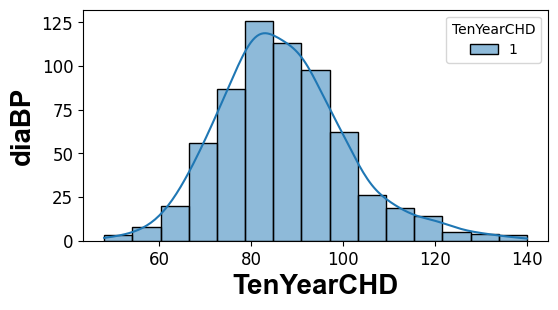

In [104]:
plt.figure(figsize=(6,3))
sns.histplot(data = df[df['TenYearCHD'] == 1], x = 'diaBP', hue = 'TenYearCHD', kde = True, bins = 15)
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('TenYearCHD', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('diaBP', fontsize = 20, fontweight='bold', **csfont)

### prevalentHyp vs CHD

#### From the bar plot, we can see that the patients suffering from hypertension are slightly more prone to suffer CHD.

Text(0, 0.5, 'counts')

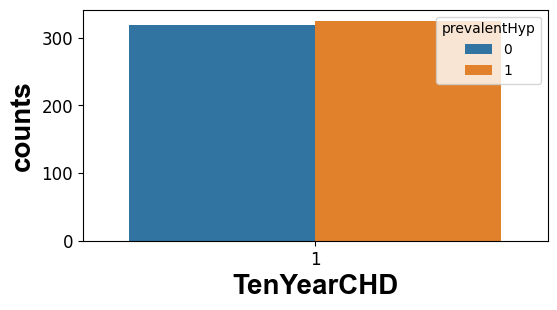

In [106]:
plt.figure(figsize=(6,3))
sns.countplot(x = 'TenYearCHD', hue = 'prevalentHyp', data = df[df['TenYearCHD'] == 1])
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('TenYearCHD', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('counts', fontsize = 20, fontweight='bold', **csfont)

## Train/test split

In [168]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# First we need to apply a standard scaler to the numerical variables such as age, cigs per day, etc., since the algorithms work better with scaled numerical features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

#### We can try to apply different classification algorithms such as Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Naive Bayes, Decision Tree, Random Forest or XGBoost

## Logistic Regression

In [170]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)

LogisticRegression()

Accuracy Score (Logistic Regression model): 84.90566037735849 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

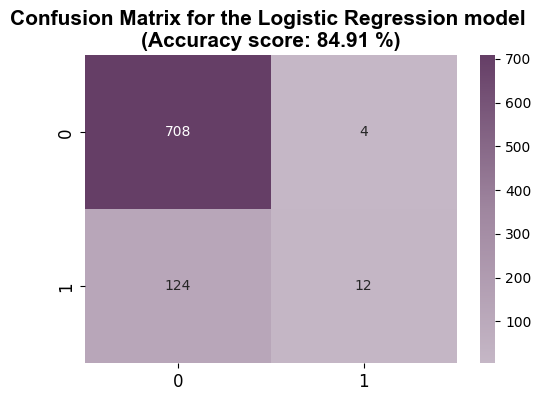

In [218]:
lr_ypred = classifier_lr.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy Score (Logistic Regression model):", accuracy_score(y_test, lr_ypred)*100, "%") # Print the accuracy score for the predictions

cm_lr = confusion_matrix(y_test, lr_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Logistic Regression model \n(Accuracy score: {accuracy_score(y_test, lr_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## K-Nearest Neighbors

In [248]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

classifier_kn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Initialise a standard KNN classifier

param_grid = {'n_neighbors': range(1,21)}  # Define the range of neighbors to test
grid_search = GridSearchCV(estimator = classifier_kn, param_grid = param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)
optimal_neighbors = grid_search.best_params_['n_neighbors']  # extract the optimal number of neighbors
best_score = grid_search.best_score_
print(f"Optimal number of neighbors: {optimal_neighbors}")
print(f"Best cross-validation accuracy: {best_score}")

classifier_kn = KNeighborsClassifier(n_neighbors = optimal_neighbors, metric = 'minkowski', p = 2) # Redo the KNN clasiffier with optimal neighbors
classifier_kn.fit(X_train, y_train)

Optimal number of neighbors: 12
Best cross-validation accuracy: 0.8499406988413465


KNeighborsClassifier(n_neighbors=12)

Accuracy Score (K-Nearest Neighbors model): 84.08018867924528 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

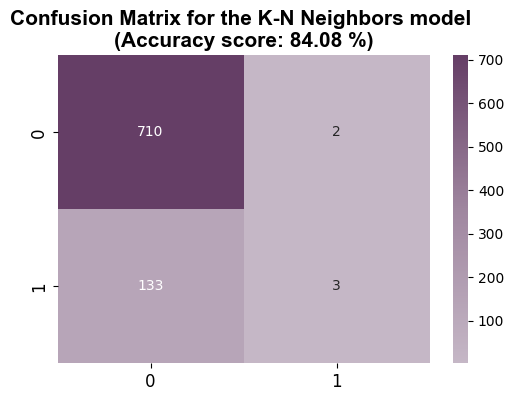

In [250]:
kn_ypred = classifier_kn.predict(X_test)

print("Accuracy Score (K-Nearest Neighbors model):", accuracy_score(y_test, kn_ypred)*100, "%") # Print the accuracy score for the predictions

cm_kn = confusion_matrix(y_test, kn_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_kn, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the K-N Neighbors model \n(Accuracy score: {accuracy_score(y_test, kn_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## Support Vector Machine

In [252]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear', random_state = 19)
classifier_svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=19)

Accuracy Score (Support Vector Machine model): 83.9622641509434 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

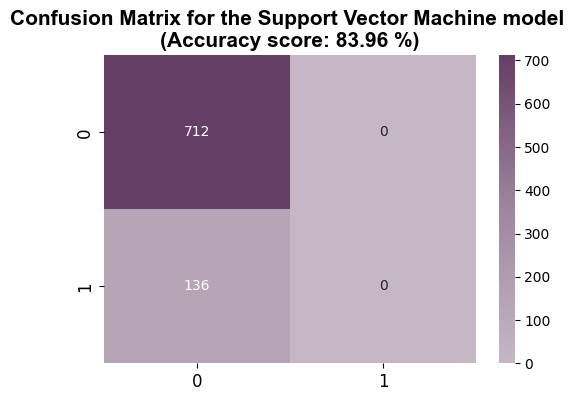

In [256]:
svc_ypred = classifier_svc.predict(X_test)

print("Accuracy Score (Support Vector Machine model):", accuracy_score(y_test, svc_ypred)*100, "%") # Print the accuracy score for the predictions

cm_svc = confusion_matrix(y_test, svc_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svc, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Support Vector Machine model \n(Accuracy score: {accuracy_score(y_test, svc_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## Naive Bayes

In [258]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

Accuracy Score (Naive Bayes model): 82.19339622641509 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

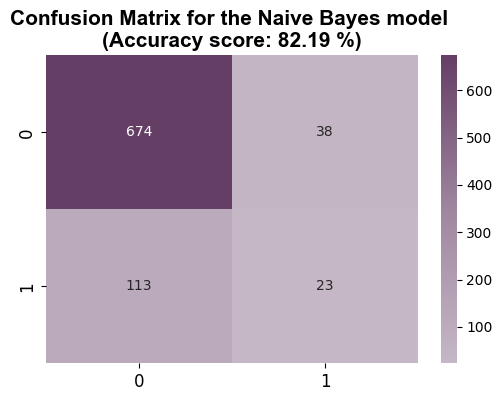

In [260]:
nb_ypred = classifier_nb.predict(X_test)

print("Accuracy Score (Naive Bayes model):", accuracy_score(y_test, nb_ypred)*100, "%") # Print the accuracy score for the predictions

cm_nb = confusion_matrix(y_test, nb_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Naive Bayes model \n(Accuracy score: {accuracy_score(y_test, nb_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## Decision Tree

In [289]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Accuracy Score (Decision Tree model): 74.88207547169812 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

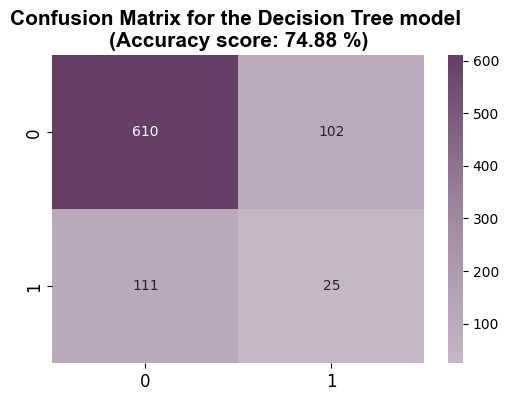

In [291]:
dt_ypred = classifier_dt.predict(X_test)

print("Accuracy Score (Decision Tree model):", accuracy_score(y_test, dt_ypred)*100, "%") # Print the accuracy score for the predictions

cm_dt = confusion_matrix(y_test, dt_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Decision Tree model \n(Accuracy score: {accuracy_score(y_test, dt_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## Random Forest

In [262]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Accuracy Score (Random Forest model): 82.19339622641509 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

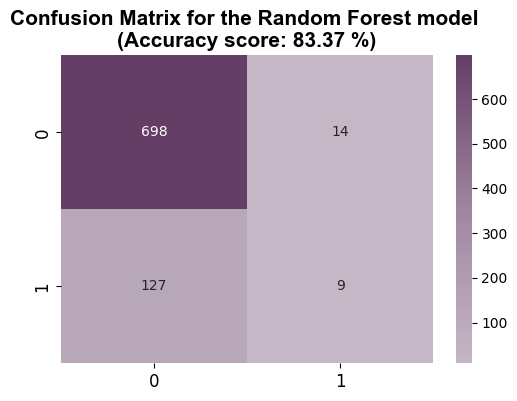

In [266]:
rf_ypred = classifier_rf.predict(X_test)

print("Accuracy Score (Random Forest model):", accuracy_score(y_test, nb_ypred)*100, "%") # Print the accuracy score for the predictions

cm_rf = confusion_matrix(y_test, rf_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Random Forest model \n(Accuracy score: {accuracy_score(y_test, rf_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## XGBoost

In [268]:
from xgboost import XGBClassifier
classifier_xg = XGBClassifier()
classifier_xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy Score (XGBoost model): 82.31132075471697 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

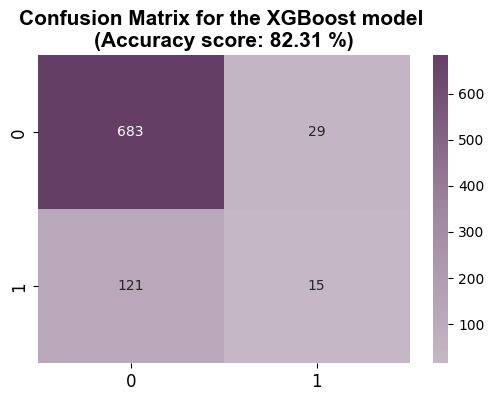

In [270]:
xg_ypred = classifier_xg.predict(X_test)

print("Accuracy Score (XGBoost model):", accuracy_score(y_test, xg_ypred)*100, "%") # Print the accuracy score for the predictions

cm_xg = confusion_matrix(y_test, xg_ypred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm_xg, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the XGBoost model \n(Accuracy score: {accuracy_score(y_test, xg_ypred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## Models performance

#### We can observe that the majority of the models present a real good performance, being the best one the Logistic Regression model

In [305]:
print('=='*15)
print('Model: Logistic Regression')
print(f'Accuracy score: {accuracy_score(y_test, lr_ypred)*100:.2f} %')

print('=='*15)
print('Model: K-Nearest Neighbors')
print(f'Accuracy score: {accuracy_score(y_test, kn_ypred)*100:.2f} %')

print('=='*15)
print('Model: Support Vector Machine')
print(f'Accuracy score: {accuracy_score(y_test, svc_ypred)*100:.2f} %')

print('=='*15)
print('Model: Naive Bayes')
print(f'Accuracy score: {accuracy_score(y_test, nb_ypred)*100:.2f} %')

print('=='*15)
print('Model: Decision Tree')
print(f'Accuracy score: {accuracy_score(y_test, dt_ypred)*100:.2f} %')

print('=='*15)
print('Model: Random Forest')
print(f'Accuracy score: {accuracy_score(y_test, rf_ypred)*100:.2f} %')

print('=='*15)
print('Model: XGBoost')
print(f'Accuracy score: {accuracy_score(y_test, xg_ypred)*100:.2f} %')


Model: Logistic Regression
Accuracy score: 84.91 %
Model: K-Nearest Neighbors
Accuracy score: 84.08 %
Model: Support Vector Machine
Accuracy score: 83.96 %
Model: Naive Bayes
Accuracy score: 82.19 %
Model: Decision Tree
Accuracy score: 74.88 %
Model: Random Forest
Accuracy score: 83.37 %
Model: XGBoost
Accuracy score: 82.31 %
